In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd
import datetime
import swifter
import numpy as np

from tqdm.notebook import tqdm

In [2]:
path_to_data = '../data/'

In [3]:
test_df = pd.read_csv(path_to_data + 'alfabattle2_prediction_session_timestamp.csv', parse_dates=['timestamp'])

In [4]:
test_df.groupby(['client_pin']).size().value_counts()

1    79268
dtype: int64

In [5]:
train_df = pd.read_csv(path_to_data + 'alfabattle2_abattle_train_target.csv', parse_dates=['timestamp'])

<AxesSubplot:>

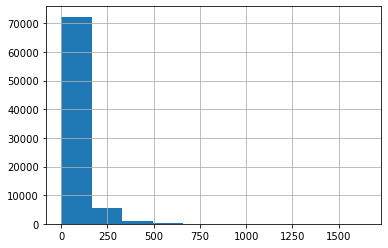

In [7]:
train_df.groupby(['client_pin']).size().hist()

In [8]:
train_df.groupby(['client_pin']).size().describe()

count    79268.000000
mean        63.901574
std         85.280433
min          1.000000
25%         14.000000
50%         35.000000
75%         80.000000
max       1646.000000
dtype: float64

<AxesSubplot:>

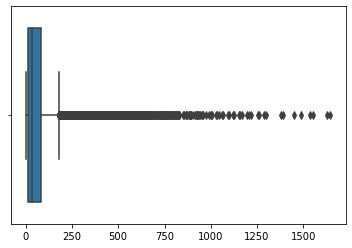

In [9]:
sns.boxplot(train_df.groupby(['client_pin']).size())

In [13]:
train_df.loc[train_df['client_pin'].map(train_df.groupby(['client_pin']).size() == 1646)].sort_values('timestamp')

,session_id,client_pin,timestamp,multi_class_target
1811368,64577b7363222ea94fc546347a1b26ef,674595ee5acb8c2ede30dadfa722ba9d,2020-01-01 09:23:59,statement
2343402,a6f11f43659be2d2cd99a295a1b15c90,674595ee5acb8c2ede30dadfa722ba9d,2020-01-02 06:55:07,mobile_recharge
4311119,c7b8d7aa6d11cc90e313f9bdaaf9fae0,674595ee5acb8c2ede30dadfa722ba9d,2020-01-02 08:45:27,card_recharge
4543509,3fca522157c43f9bd8c7aaffbf2e6787,674595ee5acb8c2ede30dadfa722ba9d,2020-01-02 09:12:01,statement
4684954,3a22ccf09d224309fb43c3d0e85584a7,674595ee5acb8c2ede30dadfa722ba9d,2020-01-02 09:32:51,statement
...,...,...,...,...
259124,cd975992021f1f9951255c7775c76ca5,674595ee5acb8c2ede30dadfa722ba9d,2020-07-30 13:26:17,main_screen
1155293,ff470d57211a67c86126381a77f3b9aa,674595ee5acb8c2ede30dadfa722ba9d,2020-09-25 07:01:48,card_recharge
1745389,23d524b52f49c107f3b4ecc9123ce9fe,674595ee5acb8c2ede30dadfa722ba9d,2020-09-25 16:12:35,main_screen
3425470,11f50a971370b86ca8226dbd2698125a,674595ee5acb8c2ede30dadfa722ba9d,2020-09-25 18:04:38,main_screen


In [14]:
train_df.drop_duplicates(subset='client_pin', keep='last')['multi_class_target'].value_counts()

main_screen             33559
statement               12508
credit_info             10659
chat                     4672
mobile_recharge          3619
own_transfer             3490
phone_money_transfer     3484
card_recharge            3373
card2card_transfer       2909
invest                    995
Name: multi_class_target, dtype: int64

In [15]:
train_df['multi_class_target'].value_counts()

main_screen             2280763
statement                922569
credit_info              498698
own_transfer             290077
mobile_recharge          266485
phone_money_transfer     232911
card2card_transfer       193378
chat                     184775
card_recharge            138616
invest                    57078
Name: multi_class_target, dtype: int64

<AxesSubplot:>

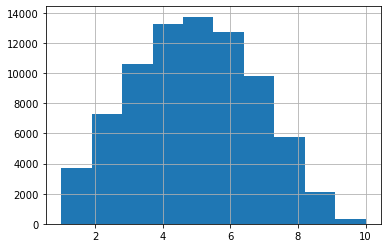

In [17]:
train_df.groupby(['client_pin'])['multi_class_target'].nunique().hist()

In [18]:
train_df.head(1)

,session_id,client_pin,timestamp,multi_class_target
0,0000029e72e5fcde6a9f29c3a3ed198f,7cf9221322a0e2fdefb1b998b8f2ab29,2020-06-15 14:01:12,main_screen


In [19]:
train_df['hour'] = train_df['timestamp'].apply(lambda x: x.hour)

In [25]:
train_df.groupby(['multi_class_target'])['hour'].agg(['median', 'mean', pd.Series.mode, 'count']).sort_values('count', ascending=False)

,median,mean,mode,count
multi_class_target,,,,
main_screen,13,13.197554,12,2280763
statement,14,13.598971,14,922569
credit_info,13,13.037818,10,498698
own_transfer,14,13.575092,13,290077
mobile_recharge,12,12.344826,9,266485
phone_money_transfer,14,13.510839,12,232911
card2card_transfer,14,13.703793,12,193378
chat,14,13.464700,13,184775
card_recharge,14,13.410515,14,138616


In [27]:
train_df.groupby(['client_pin'])['multi_class_target'].size() == 1

client_pin
000033b6509acd1c8eb0d06ebd2e1de9    False
0003653d4fa5e963ef379d65dd1d26ef    False
0003a7947510434f8248b5b6a1eba0fa    False
0005e7be2d89541ceea6b2f0bb4bc790    False
00067f6a7575df6f067b3677b6ebfadc    False
                                    ...  
fffe62aa2ba7ac131c25ef6bde9fdb2f    False
fffeb4fad3aa3603f65d7c847efbe93d    False
ffffa1546e530f390a721a535477fb26    False
ffffdc3b688b6b4dbb1f468f12d4c9c5    False
ffffe1150b0d2ca8005786cd35729226    False
Name: multi_class_target, Length: 79268, dtype: bool

In [30]:
tmp_df = train_df[train_df['client_pin'].map(train_df.groupby(['client_pin'])['multi_class_target'].size() == 1)]

<AxesSubplot:>

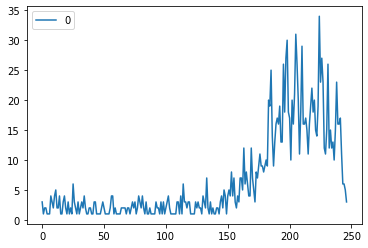

In [34]:
tmp_df.groupby(tmp_df['timestamp'].dt.date).size().reset_index().sort_index().plot()

In [35]:
columns_to_read = ['timestamp', 'client', 'session_id']

In [36]:
sample_click_stream = pd.read_parquet(path_to_data + 'alfabattle2_abattle_clickstream/part-00000.parquet', columns=columns_to_read)

In [41]:
clients_from_clickstream = test_df[test_df['client_pin'].isin(sample_click_stream['client'].unique())]['client_pin'].unique()

In [44]:
mask = train_df[train_df['client_pin'].isin(clients_from_clickstream)].groupby(['client_pin'])['multi_class_target'].size() == 1

In [46]:
clients_with_one_train_label = train_df[train_df['client_pin'].map(mask).fillna(False)]['client_pin'].unique()

In [48]:
sample_click_stream[sample_click_stream['client'].isin(clients_with_one_train_label)].groupby(['client'])['session_id'].size().describe()

count     161.000000
mean      139.527950
std       244.186662
min         4.000000
25%        47.000000
50%        80.000000
75%       144.000000
max      2594.000000
Name: session_id, dtype: float64

<AxesSubplot:xlabel='session_id'>

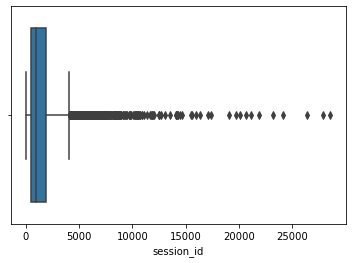

In [50]:
sns.boxplot(sample_click_stream.groupby(['client'])['session_id'].size())

In [51]:
sample_click_stream.groupby(['client'])['session_id'].size().describe()

count     8211.000000
mean      1518.523322
std       1876.622313
min          1.000000
25%        434.500000
50%        935.000000
75%       1894.500000
max      28570.000000
Name: session_id, dtype: float64